# Restful API & Flask : Theorical Questions

1. What is a RESTful API?
  - A RESTful API (Representational State Transfer API) is a way for two computer systems to communicate over the internet using simple rules. It follows a standard style where data is sent and received using HTTP methods like :
      - GET - to read data
      - POST - to create new data
      - PUT - to update data
      - DELETE - to remove data
  -  A RESTful API allows different apps or systems to share and exchange information easily using the web.
  - RESTful APIs usually use URLs to access specific pieces of data and the information is often shared in a format called JSON.
  - For example, a URL like https://api.example.com/users/1 might give us the details of the user with ID 1.

2. Explain the concept of API specification.
  - An API specification is a detailed document that explains how an API works. It tells developers :
      - What the API can do.
      - What URLs (endpoints) to use.
      - What kind of data to send (like JSON).
      - What kind of data the API will return.
      - What errors might happen and how they are shown.
  - An API specification explains everything we need to know to use an API properly.
  - It is like an instruction manual or a contract between two systems. It helps developers understand how to connect with the API without guessing.
  - For example, an API specification might say :
      - Use GET /products to get a list of products.
      - Use POST /users with a name and email to create a new user.
  - Popular tools like OpenAPI are used to write and share API specifications.


3. What is Flask, and why is it popular for building APIs?
  - Flask is a Python web framework that helps us build web applications and APIs easily. It's called a "micro" framework because it's lightweight and doesn't come with a lot of extra tools-just the basics we need to get started.
  - Why Flask is popular for building APIs :
      - Easy to learn - Great for beginners and simple to understand.
      - Lightweight and flexible - We can build small or large APIs as we need.
      - Built-in support for routing - Helps us create URLs (endpoints) easily.
      - Good community support - Lots of tutorials, examples, and tools.
      - Works well with JSON - Which is the most common data format used in APIs.

4. What is routing in Flask?
  - Routing in Flask means connecting a URL (web address) to a function in our code. When someone visits that URL, Flask runs the function and shows the result.
  - It's like giving each webpage or API endpoint its own name and instructions.
  - Routing lets us control what happens when someone visits a certain URL in our web app or API.
  - In below example :
      - Visiting / shows "Welcome to the homepage!"
      - Visiting /about shows "This is the about page."

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def home():
    return "Welcome to the homepage!"

@app.route('/about')
def about():
    return "This is the about page."

if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


5. How do you create a simple Flask application?
  - To create a simple Flask app, follow these steps :
      - Step 1 : Install Flask - pip install flask.
      - Make sure that Flask is installed in our environment.
      - Step 2 : Create the the API file (app.py and write the Flask code here).
      - Step 3 : Run the app - In our teminal, go to the directory where app.py file is saved and then run.

6. What are HTTP methods used in RESTful APIs?
  - RESTful APIs use HTTP methods to tell the server what action to do. The main ones are :
      - GET : Used to get data from the server.
      - POST : Used to send or create new data.
      - PUT : Used to update existing data completely.
      - PATCH : Used to update part of the data (not all).
      - DELETE : Used to remove data.

7. What is the purpose of the @app.route() decorator in Flask?
  - The @app.route() decorator in Flask is used to connect a URL to a specific function.
  - It tells Flask : "When someone visits this URL, run this function and show its result."
  - It helps us create different pages or API endpoints in our web app.

In [ ]:
# Example :
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "This is the homepage!"

  - When someone goes to / (the homepage), Flask runs the home() function and shows : "This is the homepage!"

8. What is the difference between GET and POST HTTP methods?
  - GET Method :     
      - Used to get data from the server.
      - Sends data through the URL (e.g., ?name=Ali).
      - Not secure for sensitive data (data is visible in the URL).
      - Can be bookmarked and shared.
      - Good for reading or viewing information.
      - Does not change anything on the server.
      - Example use: searching, viewing a profile.
  - POST Method :    
      - Used to send data to the server.
      - Sends data in the body of the request (not in the URL).
      - More secure for sending sensitive info like passwords.
      - Cannot be bookmarked (URL stays the same).
      - Good for creating or submitting new data.
      - Can change things on the server (like creating a new user).
      - Example use: login form, registration, uploading.

9. How do you handle errors in Flask APIs?
  - Use @app.errorhandler, try-except or abort() to show helpful error messages and return proper status codes.

In [ ]:
# 1. Use @app.errorhandler() : Catch and respond to specific errors like 404 or 500.
@app.errorhandler(404)
def not_found(error):
    return {"error": "Page not found"}, 404

# 2. Use Try and except in routes : Catch code errors inside a route.
@app.route('/divide')
def divide():
    try:
        result = 10 / 0  # This will cause an error
        return {"result": result}
    except ZeroDivisionError:
        return {"error": "You can't divide by zero!"}, 400

# 3. Return custom error responses : Return messages with status codes.
#return {"error": "Invalid input"}, 400

# 4. Use abort() for manual error triggering : Forcefully stop a request with an error.
from flask import abort

@app.route('/admin')
def admin():
    abort(403)  # Forbidden

10. How do you connect Flask to a SQL database?
  - Step-by-step to connect Flask to SQL :
      - Install Flask and Flask-SQLAlchemy : Install flask and flask_sqlalchemy using pip. This gives us access to both flask for the web part and sqlalchemy for the database part.
      - Create the Config File : We create a config.py file to store database configuration. This is a good practice so that we can manage environment-specific settings easily. For example : SQLALCHEMY_DATABASE_URI = 'sqlite:///users.db' (This line tells Flask to use a local SQLite database named users.db)
      - Create a Models File : We define our database tables as Python classes in a separate file (models.py). For example, a User class becomes a users table with columns like id, name, and email.
      - Connect Everything in our Main Flask App : In our app.py, we : Import the Flask app, Load the configuration, Initialize the database connection using db.init_app(app), Define our routes (API endpoints).
      - Create Tables Automatically : We can tell Flask to create the database tables the first time it runs by using the @app.beforefirstrequest decorator and calling db.create_all() inside it.
      - Define Routes to Interact with the Database : We build routes like :
          - /add// : to add a user.
          - /users : to retrieve all users as JSON.

11. What is the role of Flask-SQLAlchemy?
  - Flask-SQLAlchemy is a Flask extension that helps connect Flask apps to SQL databases. It makes working with databases in Flask easier using Python classes instead of writing raw SQL. Flask-SQLAlchemy is a bridge between Flask and our SQL database, making database tasks simpler and more Pythonic.
  - Main Roles of Flask-SQLAlchemy :
      - Connects Flask to a database (like SQLite, MySQL, PostgreSQL).
      - Lets us define tables using Python classes (called models).
      - Helps us add, update, delete and query data easily.
      - Manages the database session for us.
      - Makes code cleaner and more readable than using raw SQL.

12. What are Flask blueprints and how are they useful?
  - A Blueprint in Flask is a way to organize code into separate parts. It is like a mini app inside our main app. It lets us split large Flask apps into smaller, reusable modules.
  - Blueprints are useful because they :
      - Organize our code better : Instead of putting all our routes in one big file, we can split them into separate files (like auth.py, blog.py, etc.)
      - Make large apps easier to manage : Each feature or section of our app can be handled in its own blueprint.
      - Allow code reusability : We can reuse blueprints in different projects without rewriting code.
      - Support teamwork : Different developers can work on different blueprints without interfering with each other's code.
      - Keep things clean and modular : Just like folders help organize files, blueprints help organize our Flask code.

13. What is the purpose of Flask's request object?
  - Request object is a built-in object that lets us access data sent by the client (like a browser or API user). It's part of the flask module and used to handle incoming HTTP requests.
  - What we can do with request :    
      - Get data from form submissions (like : name = request.form['name'])
      - Get data from URL query parameters (e.g., search = request.args.get('search'))
      - Get JSON data from API requests (like : data = request.get_json())
      - Check request method (GET, POST, etc.) (e.g., if request.method == 'POST': #  handle post)
      - Get headers, files, cookies, etc. (like : user_agent = request.headers.get('User-Agent'))

14. How do you create a RESTful API endpoint using Flask?

In [ ]:
# Steps to Create a RESTful API Endpoint in Flask :

# 1. Import Flask and create an app
from flask import Flask, jsonify, request

app = Flask(__name__)

# 2. Create an endpoint (e.g., GET and POST)
# GET endpoint
@app.route('/api/greet', methods=['GET'])
def greet():
    return jsonify({'message': 'Hello, welcome to the API!'})

# POST endpoint
@app.route('/api/echo', methods=['POST'])
def echo():
    data = request.get_json()
    return jsonify({'you_sent': data})

# 3. Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


15. What is the purpose of Flask's jsonify() function?
  - jsonify() is a Flask function that converts our data (like dictionaries or lists) into a JSON response. It also sets the correct content type (application/json) in the response header.
  - jsonify() is used to send JSON data from our Flask API in a clean, proper and safe way.
  - Why it is useful :
      - Makes it easy to return JSON from our API.
      - Automatically formats the data as valid JSON.
      - Adds correct MIME type and status code.
      - Works better than return json.dumps(...) for Flask responses.

16. Explain Flask's url_for() function.
  - url_for() is a Flask helper function used to generate URLs for routes defined in our app.
  - Instead of hardcoding URLs, we can refer to the function name of a route.
  - Why it is useful :     
      - Avoids hardcoding URLs - if we change the route, we don't have to change it everywhere.
      - Dynamic URLs - it can build URLs with parameters easily.
      - Cleaner and safer - prevents mistakes with typos in URL strings.

In [ ]:
# How it's work :
# Suppose we have this route :
@app.route('/profile/<username>')
def profile(username):
    return f"Profile: {username}"

# We can generate a link to it like this :
url_for('profile', username='raj')
# Output: '/profile/raj'

17. How does Flask handle static files (CSS, JavaScript, etc.)?
  - Flask serves static files from the static/ folder and makes them accessible via /static/filename. Use url_for('static', filename='...') to link them in our templates.
  - By default, Flask looks for static files in a folder named static in our project directory.
```
  - Example structure :

                    our_project/
                    ├── app.py
                    └── static/
                        ├── style.css
                        └── script.js
                        
  - We can access static files in our HTML using the url_for() function :

              <link rel="stylesheet" href="{{ url_for('static', filename='style.css') }}">
              <script src="{{ url_for('static', filename='script.js') }}"></script>


  - Flask serves these files automatically from the /static URL path.





18. What is an API specification, and how does it help in building a Flask API?
  - An API specification is a detailed document or file that describes how an API works. It defines available endpoints, HTTP methods, expected inputs/outputs, data formats and error responses.
  - What it usually includes :
      - Endpoints (e.g., /users, /products/<id>)
      - Methods (GET, POST, PUT, DELETE)
      - Request parameters (query, path, headers)
      - Response format (JSON structure, status codes)
      - Authentication info (if needed)
  -  How it helps in building a Flask API :
      - Clear blueprint : Acts like a guide for developers to follow while building the API in Flask.
      - Improves collaboration : Backend and frontend teams can work in parallel using the same reference.
      - Supports testing : Tools like Postman or Swagger can auto-generate tests and documentation.
      - Enables documentation : Users and developers understand how to use our API.

19. What are HTTP status codes and why are they important in a Flask API?
  - HTTP status codes are 3-digit numbers returned by a server to indicate the result of a request. They help the client (like a browser or mobile app) understand what happened - success, error, redirection, etc.
  - Common Categories of Status Codes :
      - 1xx : Informational (e.g., 100 Continue).
      - 2xx : Success
          - 200 OK : Request was successful.
          - 201 Created : A resource was created.
      - 3xx : Redirection (e.g., 301 Moved Permanently).
      - 4xx : Client error
          - 400 Bad Request : Client sent wrong data.
          - 404 Not Found : Resource doesn't exist.
      - 5xx : Server error
          - 500 Internal Server Error : Something broke on the server.
  - Why they are important in a Flask API :
      - Clear communication : Let the client know what happened (success, error, invalid data, etc.).
      - Better user experience : Apps can respond differently to different status codes.
      - Easier debugging : Developers can quickly spot and fix problems.
      - API automation : Tools and scripts use status codes to handle responses automatically.

20. How do you handle POST requests in Flask?
  - A POST request is used to send data to the server, like submitting a form or creating a new record. In Flask, we handle POST requests by checking if the request method is 'POST' and then reading the data sent.
  - Steps to Handle POST in Flask :
      1. Import Flask and request object.
      2. Use @app.route() with methods=['POST'].
      3. Access the data with request.form, request.json or request.get_json().



In [ ]:
# Example :
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/submit', methods=['POST'])
def submit_data():
    data = request.get_json()  # Get JSON data from request body
    name = data.get('name')
    return jsonify({"message": f"Hello, {name}!"}), 200

if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


21. How would you secure a Flask API?
  - Securing a Flask API means protecting it from unauthorized access, data leaks and attacks. Here are some key methods to do that :
  - 1. Use Authentication :     
      - Require users to log in or provide credentials (e.g., API key, token).
      - Use :
          - Token-based authentication (like JWT)
          - OAuth 2.0
          - Basic Auth (for simple cases)
  - 2. Use Authorization :     
      - Make sure only allowed users can access certain endpoints.
      - Example : Only admins can delete users.
  - 3. HTTPS (SSL/TLS) :    
      - Always use HTTPS to encrypt data in transit.
      - Prevents eavesdropping and man-in-the-middle attacks.
  - 4. Validate Input Data :    
      - Use libraries like Flask-WTF or Marshmallow to :
          - Check required fields
          - Prevent SQL injection or XSS
  - 5. Use Flask extensions for security :    
      - Flask-Login - for user sessions
      - Flask-JWT-Extended - for JWT token handling
      - Flask-Limiter - to add rate limiting (protects from brute force)
  - 6. Handle Errors Gracefully :    
      - Avoid returning raw error messages (which may leak info).
      - Return custom error messages with proper HTTP status codes.
  - 7. Secure API Keys and Secrets :    
      - Store keys (like DB passwords or tokens) in environment variables.
      - Never hard-code secrets in our code.
  - 8. CORS Policy :    
      - Use Flask-CORS to control which domains can access our API.


22. What is the significance of the Flask-RESTful extension?
  - Flask-RESTful is an extension for Flask that makes it easier and cleaner to build RESTful APIs.
  - Flask-RESTful gives us a structured, powerful and professional way to create APIs in Flask - especially useful for larger projects.
  - Key Benefits / Significance :
      - 1. Simplifies API Development :
          - Helps organize API routes into classes instead of just functions.
      - 2. Adds Resource-Based Routing :
          - We can define resources using Python classes (like User, Item, etc.).
          - Each class handles different HTTP methods (GET, POST, etc.).
      - 3. Cleaner Code Structure :    
          - Encourages object-oriented design, making large APIs easier to maintain.
      - 4. Built-in Argument Parsing :    
          - Has built-in tools to handle and validate request arguments (reqparse).
      - 5. Supports Custom Error Messages :    
          - Makes it easy to handle errors and return custom HTTP status codes.

23. What is the role of Flask's session object?
  - Flask's session object is used to store data across multiple requests made by the same user - like a temporary memory for a user.
  - Key Roles of session in Flask :
      - 1. Tracks User Data :    
          - Stores data like login status, username, shopping cart items, etc.
          - Keeps the user "logged in" across different pages.
      - 2. Stores Data Temporarily :    
          - Data in session is saved only for that user and cleared when the browser is closed or the session ends.
      - 3. Secured with Cookies :    
          - Flask stores session data in a cookie that's signed with a secret key.
          - This prevents tampering but keeps the data on the client side.

# Restful API & Flask : Practical Questions

In [ ]:
#1. How do you create a basic Flask application?

# Here's a step-by-step example to create a basic Flask app :

# step 1 : Install Flask
# pip install Flask (I already installed)

# step 2 : Create the the API file (app.py and write the Flask code here).
# app.py

from flask import Flask  # Import Flask class

app = Flask(__name__)  # Create the app object

@app.route('/')  # Define the route for the home page
def home():
    return 'Hello, Flask!'  # What shows in the browser

# Run the app
if __name__ == '__main__':
    app.run(debug=True)  # Starts the server
# step 3 : Run the app.py file

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


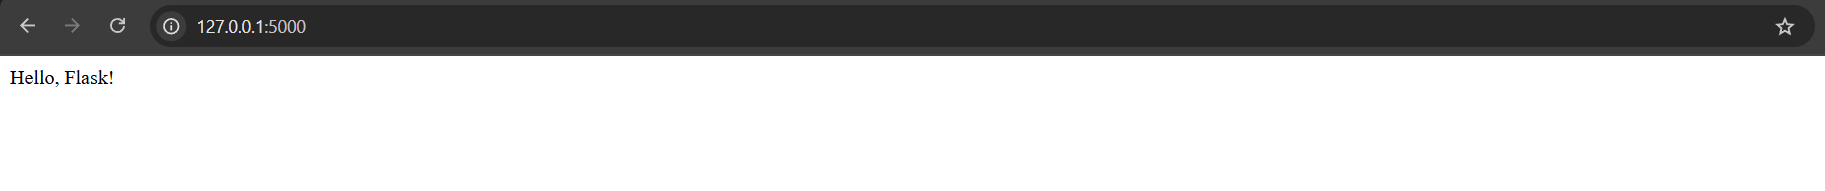

In [ ]:
#2. How do you serve static files like images or CSS in Flask?

# Flask automatically serves static files (like CSS, JavaScript, and images) from a folder named static/.

# Folder Structure Example :
# our_project/
# ├── app.py
# ├── static/
# │   ├── style.css
# │   └── logo.png
# └── templates/
#     └── index.html

# app.py
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Loads the HTML page

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


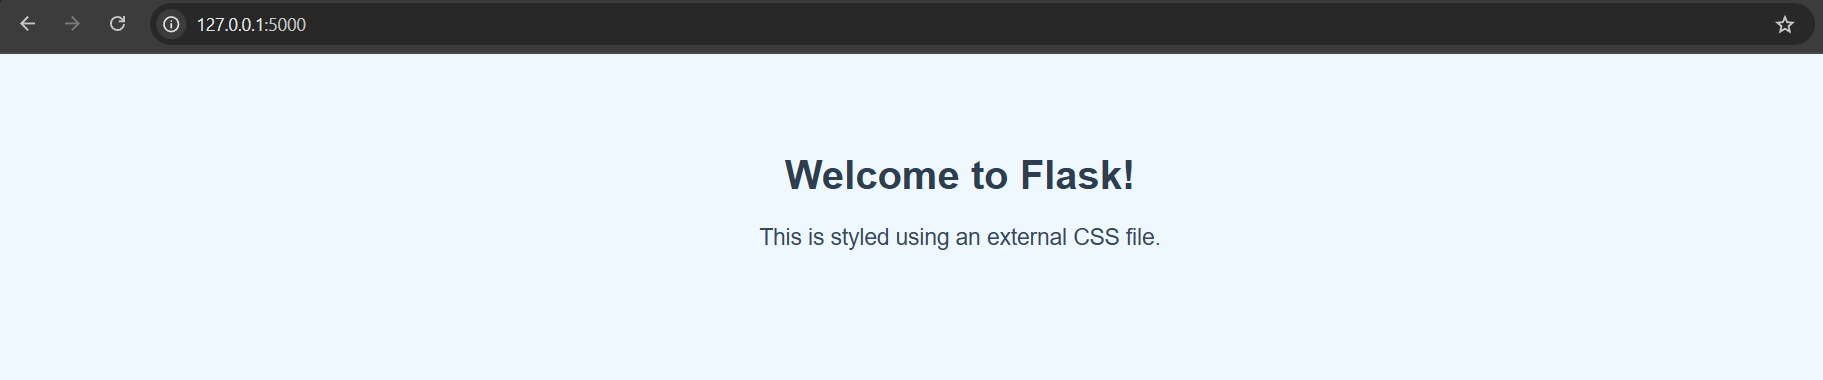

In [ ]:
#3. How do you define different routes with different HTTP methods in Flask?
from flask import Flask, request

app = Flask(__name__)

@app.route('/greet', methods=['GET', 'POST'])
def greet():
    if request.method == 'POST':
        name = request.form.get('name')
        return f"Hello, {name}! (from POST)"
    else:  # GET request
        return '''
            <form method="POST">
                <input type="text" name="name" placeholder="Enter your name">
                <input type="submit">
            </form>
        '''

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


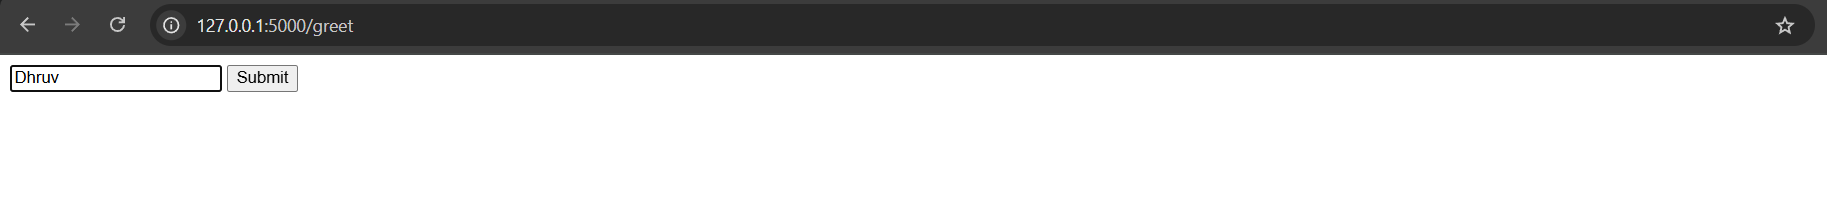

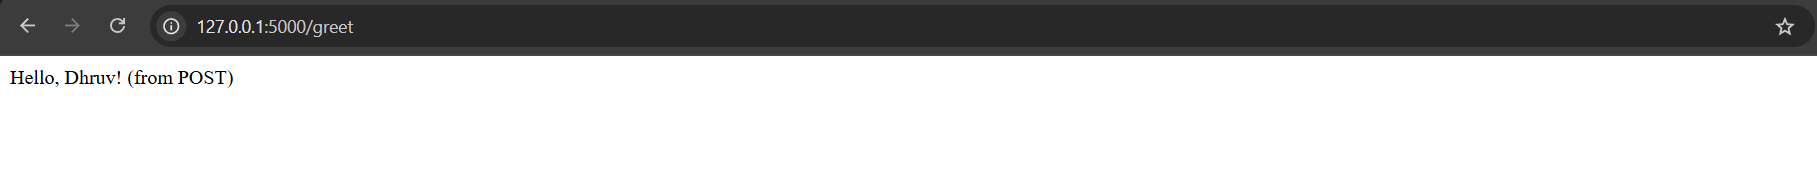

In [ ]:
#4. How do you render HTML templates in Flask?

# In Flask, we render HTML templates using the render_template() function from the flask module.
# Steps to Render HTML Templates :
# 1. Create a templates/ folder in our project directory. Flask automatically looks for HTML files inside this folder.
# 2.Place our HTML files (e.g., index.html) inside the templates/ folder.
# 3.Use render_template() in our route to render the HTML file.

# Example Folder Structure :
# our_project/
# ├── app.py
# └── templates/
#     └── index.html

# app.py
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Renders templates/index.html

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


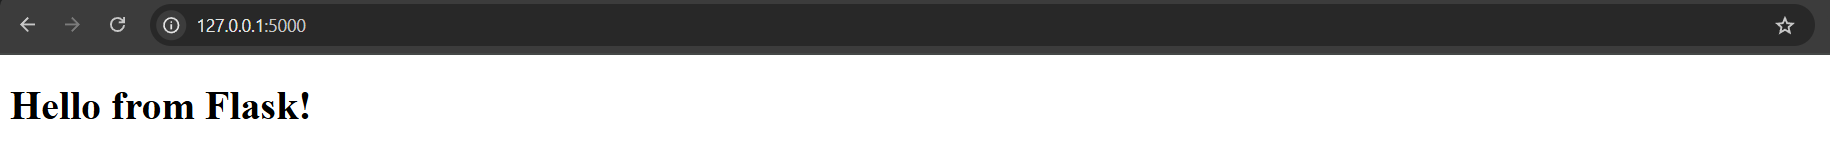

In [ ]:
#5. How can you generate URLs for routes in Flask using url_for?

# In Flask, the url_for() function is used to dynamically generate URLs for our routes based on the function name rather than hardcoding the URL paths.
from flask import Flask, url_for, redirect

app = Flask(__name__)

@app.route('/')
def home():
    # Redirect to the 'profile' route with username argument
    return redirect(url_for('profile', username='Guest'))

@app.route('/user/<username>')
def profile(username):
    return f"Welcome, {username}!"

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


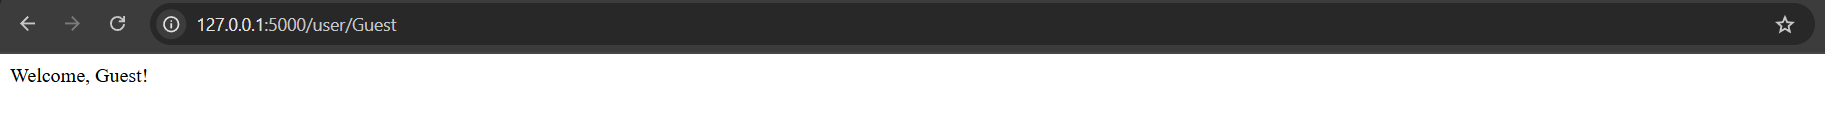

In [ ]:
#6. How do you handle forms in Flask?

# Steps to Handle Forms in Flask :
# 1. Create an HTML form.
# 2. Set method to POST.
# 3. Use request.form in Flask to get submitted data.

# app.py
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def form():
    if request.method == 'POST':
        name = request.form['name']
        return f"Hello, {name}!"
    return render_template('form.html')

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


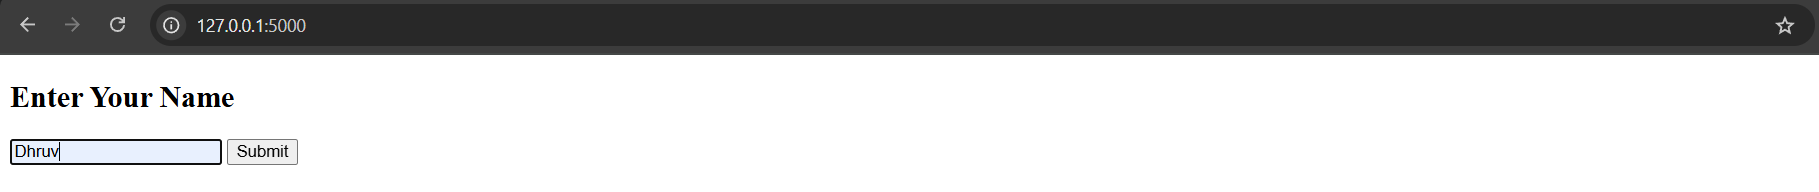

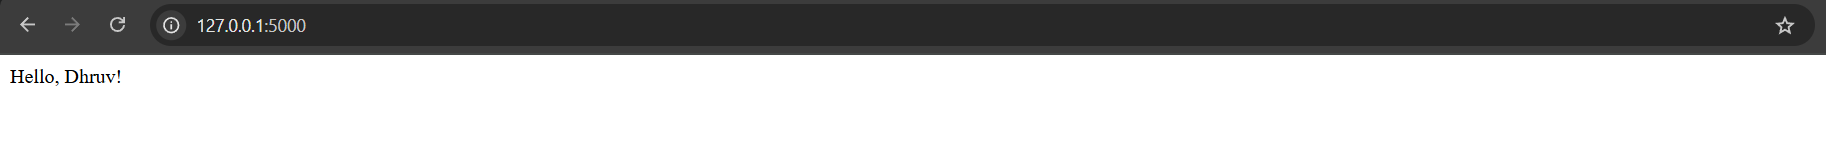

In [ ]:
#7. How can you validate form data in Flask?
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def form():
    error = ""
    if request.method == 'POST':
        name = request.form['name']
        if not name:
            error = "Name is required!"
        else:
            return f"Hello, {name}!"
    return render_template('form.html', error=error)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


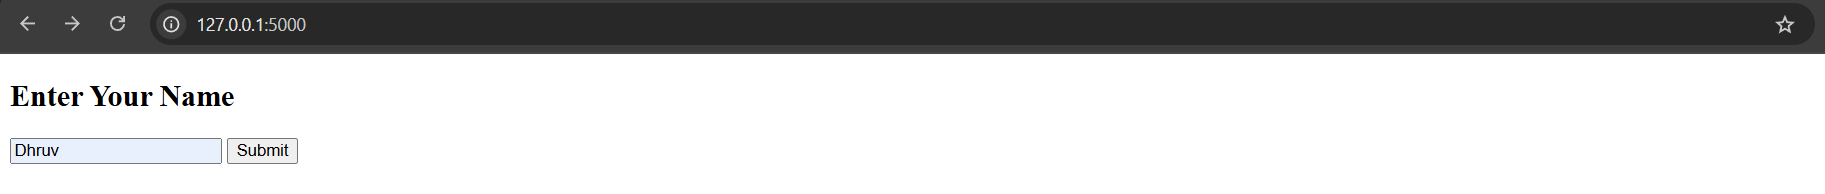

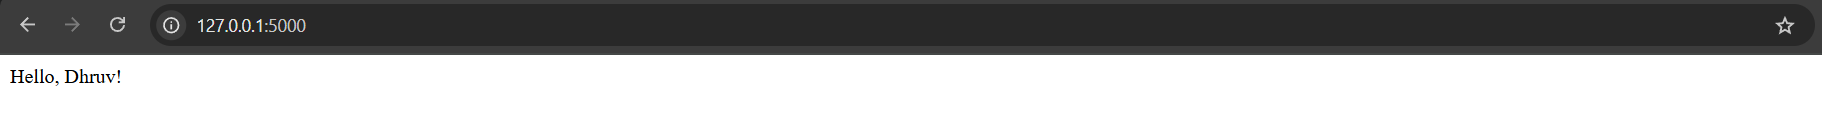

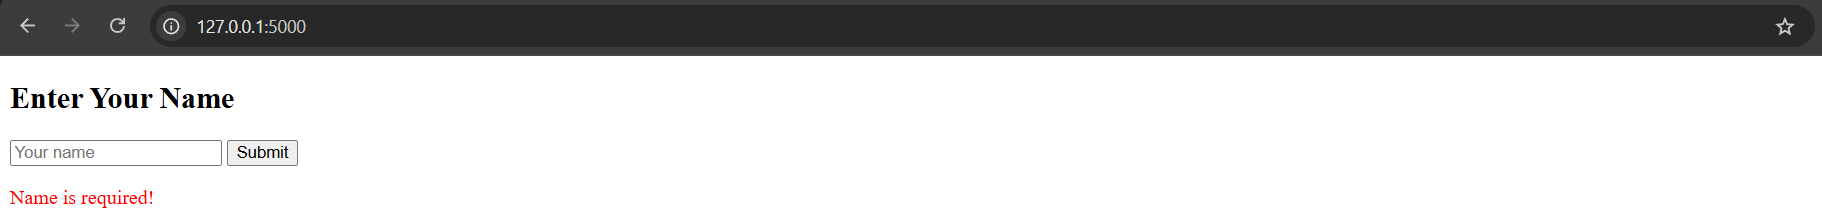

In [ ]:
#8. How do you manage sessions in Flask?
from flask import Flask, session, redirect, url_for, request
import secrets

app = Flask(__name__)
app.secret_key = secrets.token_hex(16)  # Required to sign session cookies

@app.route('/')
def index():
    if 'username' in session:
        return f'Logged in as {session["username"]}'
    return 'You are not logged in'

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        session['username'] = request.form['username']
        return redirect(url_for('index'))
    return '''
        <form method="post">
            <input type="text" name="username" placeholder="Enter username">
            <input type="submit" value="Login">
        </form>
    '''

@app.route('/logout')
def logout():
    session.pop('username', None)  # Remove user from session
    return redirect(url_for('index'))

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


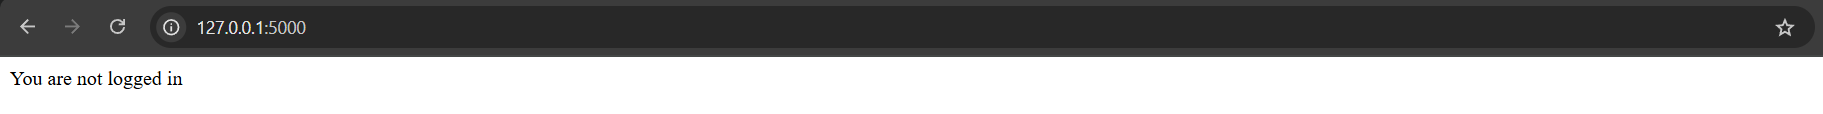

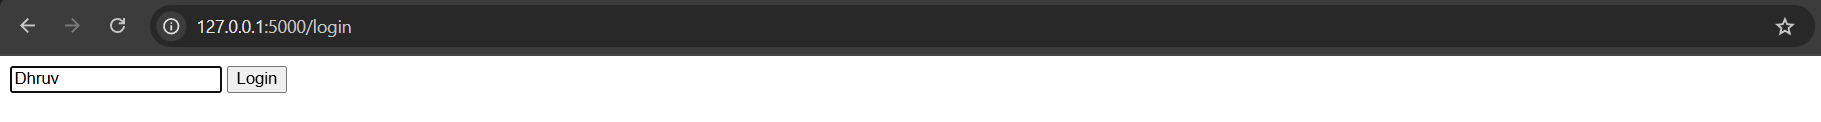

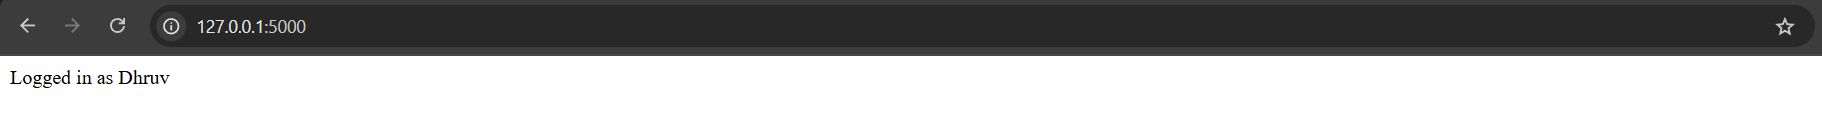

In [ ]:
#9. How do you redirect to a different route in Flask?
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/')
def home():
    return 'Welcome to the Home Page'

@app.route('/redirect-example')
def redirect_example():
    # Redirect to the home route
    return redirect(url_for('home'))

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


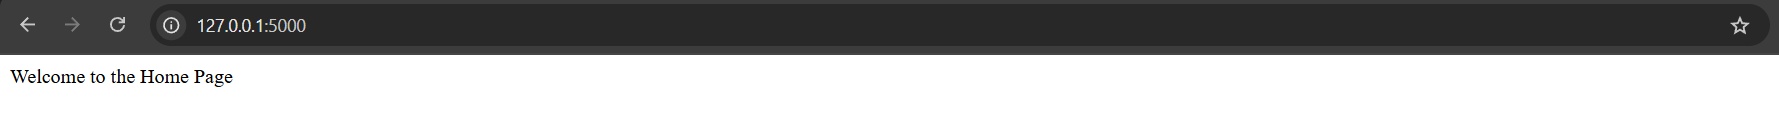

In [ ]:
#10. How do you handle errors in Flask (e.g., 404)?
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return 'Welcome to the Home Page'

# Handle 404 errors
@app.errorhandler(404)
def page_not_found(e):
    return render_template('404.html'), 404

# Handle 500 errors
@app.errorhandler(500)
def internal_server_error(e):
    return "500 - Internal Server Error", 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


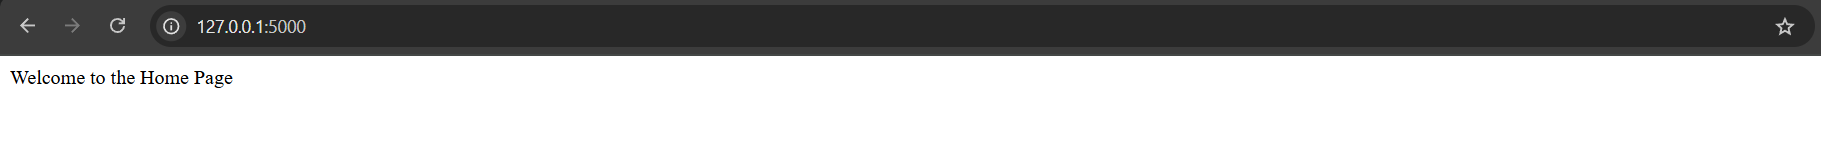

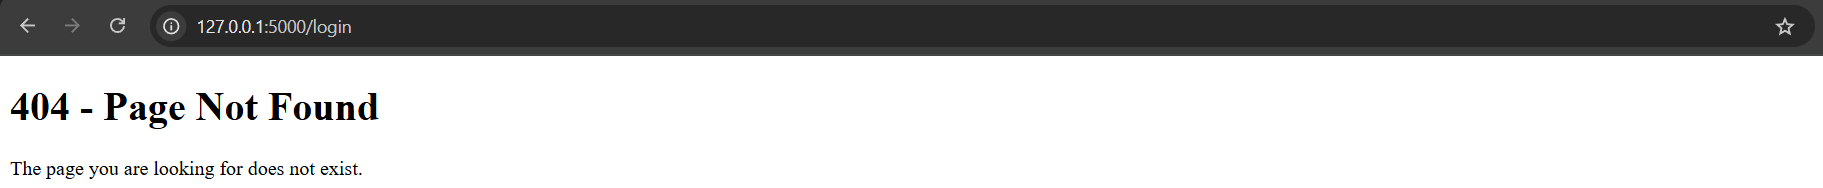

In [ ]:
#11. How do you structure a Flask app using Blueprints?

# Flask Blueprints help us organize our application into modular components. This is especially useful for larger applications.
# Example Folder Structure :
# our_project/
# ├── app.py
# ├── user/
# │   ├── __init__.py
# │   └── routes.py
# └── templates/
#     └── user_home.html

# app.py
from flask import Flask
from user.routes import user_bp

app = Flask(__name__)
app.register_blueprint(user_bp)

@app.route('/')
def index():
    return 'Welcome to the Main Page'

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


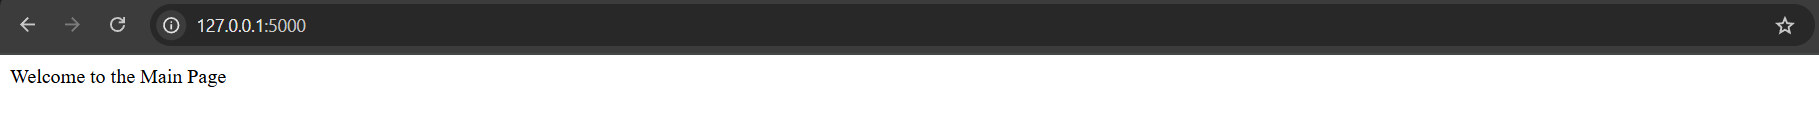

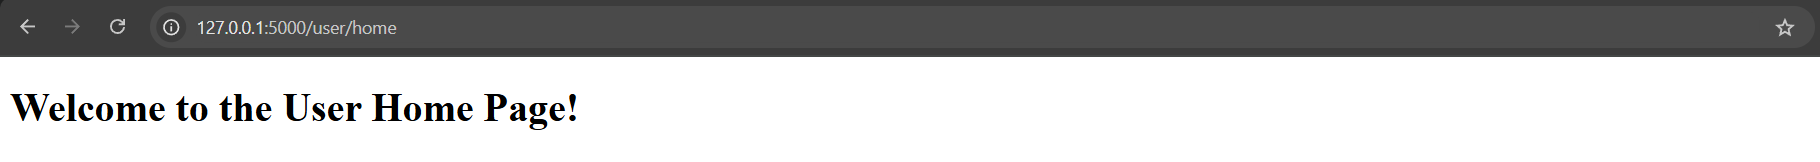

In [ ]:
#12. How do you define a custom Jinja filter in Flask?
from flask import Flask, render_template

app = Flask(__name__)

# Define the custom filter
def reverse_string(s):
    return s[::-1]

# Register the custom filter
app.jinja_env.filters['reverse'] = reverse_string

@app.route('/')
def index():
    message = "Flask"
    return render_template('index.html', message=message)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


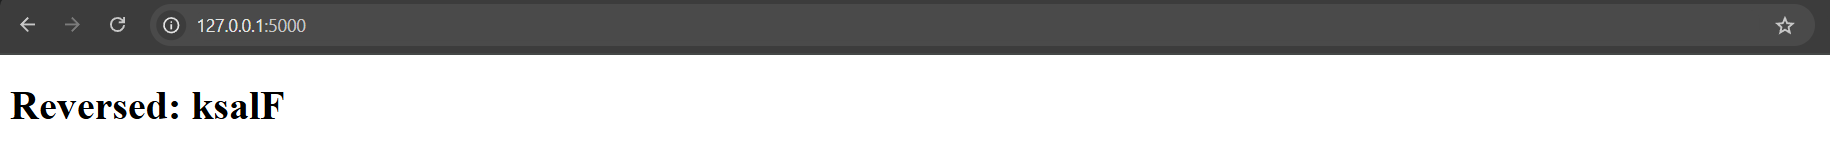

In [ ]:
#13. How can you redirect with query parameters in Flask?
from flask import Flask, redirect, url_for, request

app = Flask(__name__)

@app.route('/')
def home():
    # Redirect to /greet with query parameters
    return redirect(url_for('greet', name='Dhruv', age=22))

@app.route('/greet')
def greet():
    name = request.args.get('name')
    age = request.args.get('age')
    return f"Hello, {name}! You are {age} years old."

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


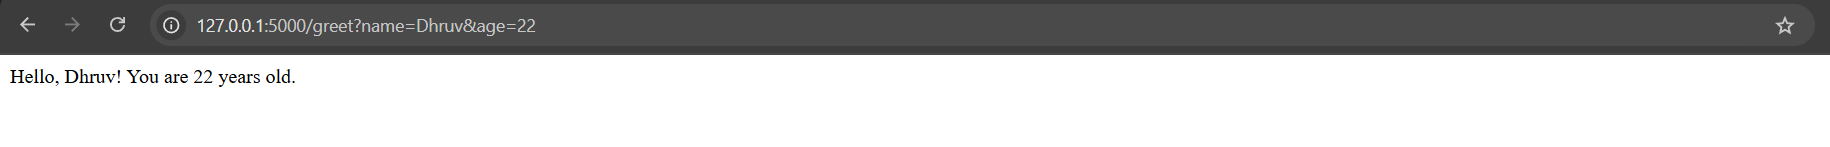

In [ ]:
#14. How do you return JSON responses in Flask?
from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/api/data')
def get_data():
    data = {
        "name": "Rohit",
        "age": 35,
        "location": "Mumbai"
    }
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


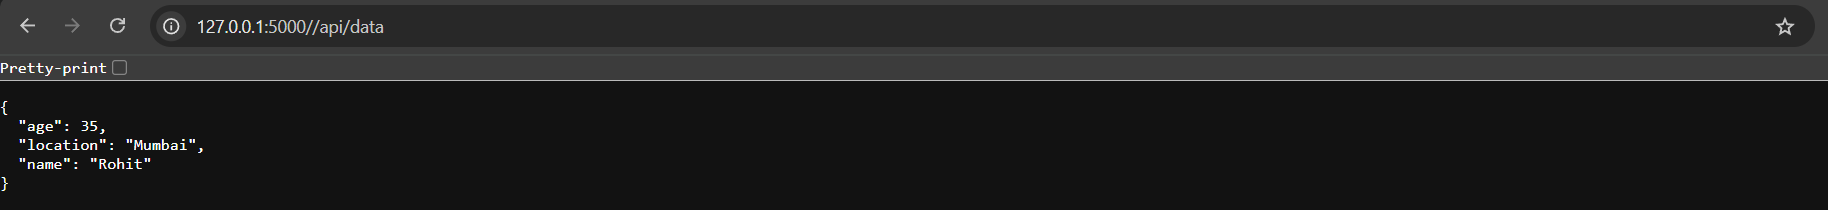

In [ ]:
#15. How do you capture URL parameters in Flask?
from flask import Flask

app = Flask(__name__)

# In Flask, We can capture URL parameters using angle brackets (< >) in the route definition. These parameters are passed as arguments to our view function.
@app.route('/user/<username>')
def show_user_profile(username):
    return f"User: {username}"

@app.route('/post/<int:post_id>')
def show_post(post_id):
    return f"Post ID: {post_id}"

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


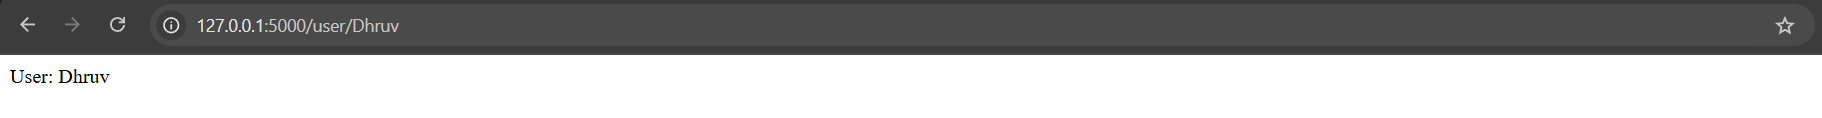

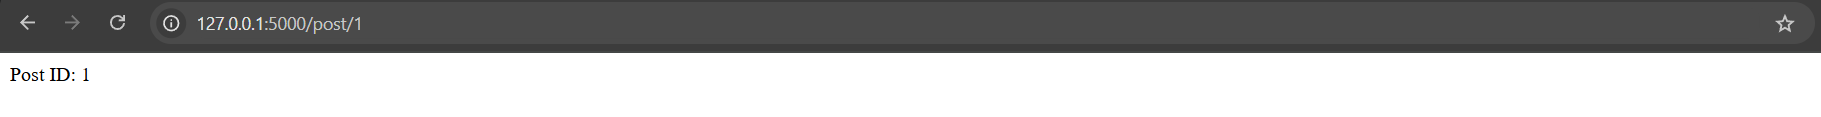